In [1]:
# %matplotlib inline
import os
import glob
import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm
import numpy as np
import mdshare
import pyemma
import pyemma.coordinates

np.version.version

'1.24.4'

In [13]:
#pdb = mdshare.fetch('pentapeptide-impl-solv.pdb', working_directory='path')
pdb = os.path.join('/home/amangini/workspace/apaga/msh', 'alfa_msh.pdb')
#files = mdshare.fetch('pentapeptide-*-500ns-impl-solv.xtc', working_directory='path')
files = glob.glob(os.path.join('/home/amangini/workspace/apaga/msh', 'protein_md_*_rot_trans.xtc'))

In [14]:
files

['/home/amangini/workspace/apaga/msh/protein_md_1_rot_trans.xtc',
 '/home/amangini/workspace/apaga/msh/protein_md_13_rot_trans.xtc',
 '/home/amangini/workspace/apaga/msh/protein_md_12_rot_trans.xtc',
 '/home/amangini/workspace/apaga/msh/protein_md_19_rot_trans.xtc',
 '/home/amangini/workspace/apaga/msh/protein_md_18_rot_trans.xtc',
 '/home/amangini/workspace/apaga/msh/protein_md_17_rot_trans.xtc',
 '/home/amangini/workspace/apaga/msh/protein_md_15_rot_trans.xtc',
 '/home/amangini/workspace/apaga/msh/protein_md_16_rot_trans.xtc',
 '/home/amangini/workspace/apaga/msh/protein_md_14_rot_trans.xtc']

In [18]:
feat = pyemma.coordinates.featurizer(pdb)
type(feat)

pyemma.coordinates.data.featurization.featurizer.MDFeaturizer

In [19]:
feat.describe()

[]

In [20]:
feat.add_backbone_torsions(cossin=True, periodic=False)
feat.add_sidechain_torsions(which='all', cossin=True, periodic=False)#talvez tenha q comentar

/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())


In [21]:
feat.describe()

['COS(PHI 0 TYR 2)',
 'SIN(PHI 0 TYR 2)',
 'COS(PSI 0 SER 1)',
 'SIN(PSI 0 SER 1)',
 'COS(PHI 0 SER 3)',
 'SIN(PHI 0 SER 3)',
 'COS(PSI 0 TYR 2)',
 'SIN(PSI 0 TYR 2)',
 'COS(PHI 0 MET 4)',
 'SIN(PHI 0 MET 4)',
 'COS(PSI 0 SER 3)',
 'SIN(PSI 0 SER 3)',
 'COS(PHI 0 GLU 5)',
 'SIN(PHI 0 GLU 5)',
 'COS(PSI 0 MET 4)',
 'SIN(PSI 0 MET 4)',
 'COS(PHI 0 HIS 6)',
 'SIN(PHI 0 HIS 6)',
 'COS(PSI 0 GLU 5)',
 'SIN(PSI 0 GLU 5)',
 'COS(PHI 0 PHE 7)',
 'SIN(PHI 0 PHE 7)',
 'COS(PSI 0 HIS 6)',
 'SIN(PSI 0 HIS 6)',
 'COS(PHI 0 ARG 8)',
 'SIN(PHI 0 ARG 8)',
 'COS(PSI 0 PHE 7)',
 'SIN(PSI 0 PHE 7)',
 'COS(PHI 0 TRP 9)',
 'SIN(PHI 0 TRP 9)',
 'COS(PSI 0 ARG 8)',
 'SIN(PSI 0 ARG 8)',
 'COS(PHI 0 GLY 10)',
 'SIN(PHI 0 GLY 10)',
 'COS(PSI 0 TRP 9)',
 'SIN(PSI 0 TRP 9)',
 'COS(PHI 0 LYS 11)',
 'SIN(PHI 0 LYS 11)',
 'COS(PSI 0 GLY 10)',
 'SIN(PSI 0 GLY 10)',
 'COS(PHI 0 PRO 12)',
 'SIN(PHI 0 PRO 12)',
 'COS(PSI 0 LYS 11)',
 'SIN(PSI 0 LYS 11)',
 'COS(PHI 0 VAL 13)',
 'SIN(PHI 0 VAL 13)',
 'COS(PSI 0 PRO 12)',


In [22]:
train_files = files[:5]
test_file = files[-1]  # last trajectory is our test data set

print(train_files)
print(test_file)

['/home/amangini/workspace/apaga/msh/protein_md_1_rot_trans.xtc', '/home/amangini/workspace/apaga/msh/protein_md_13_rot_trans.xtc', '/home/amangini/workspace/apaga/msh/protein_md_12_rot_trans.xtc', '/home/amangini/workspace/apaga/msh/protein_md_19_rot_trans.xtc', '/home/amangini/workspace/apaga/msh/protein_md_18_rot_trans.xtc']
/home/amangini/workspace/apaga/msh/protein_md_14_rot_trans.xtc


In [23]:
assert set(train_files) & set(test_file) == set()  # ensure test and train sets do not overlap

data_torsions = pyemma.coordinates.load(train_files, features=feat)
print('check - torsion1 \n')
data_torsions_test = pyemma.coordinates.load(test_file, features=feat)
print('check - torsion2 \n')

feat.active_features = []
print('check - matriz \n')
feat.add_distances_ca(periodic=False)
print('check - distance \n')

data_dists_ca = pyemma.coordinates.load(train_files, features=feat)
print('check - coord1 \n')
data_dists_ca_test = pyemma.coordinates.load(test_file, features=feat)
print('check - coord2 \n')


100%|██████████| 5/5 [00:14<00:00,  2.97s/it]                                 


check - torsion1 

check - torsion2 

check - matriz 

check - distance 



100%|██████████| 5/5 [00:09<00:00,  1.81s/it]                                 


check - coord1 

check - coord2 



In [24]:
feat.active_features = []
pairs = feat.pairs(feat.select_Heavy())
feat.add_contacts(pairs, periodic=False)

data_contacts = pyemma.coordinates.load(train_files, features=feat)
data_contacts_test = pyemma.coordinates.load(test_file, features=feat)

100%|██████████| 10/10 [00:20<00:00,  2.04s/it]                                 


In [26]:
def plot_for_lag(ax, lag, dim=3):
    vamp_torsions = pyemma.coordinates.vamp(data_torsions, lag=lag, dim=dim)
    vamp_dist_ca = pyemma.coordinates.vamp(data_dists_ca, lag=lag, dim=dim)
    vamp_contacts = pyemma.coordinates.vamp(data_contacts, lag=lag, dim=dim)

    vamps = (vamp_torsions, vamp_dist_ca, vamp_contacts)
    test_data = (data_torsions_test, data_dists_ca_test, data_contacts_test)
    labels = ('torsions', 'CA distances', 'contacts')
    for i, (v, test_data) in enumerate(zip(vamps, test_data)):
        s = v.score(test_data=test_data)
        ax.bar(i, s)
    ax.set_title('VAMP2 @ lag = {} ps'.format(lag))
    ax.set_xticks(range(len(vamps)))
    ax.set_xticklabels(labels)
    fig.tight_layout()

In [39]:
#plot_for_lag(axes[1], 2)

/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 5/5 [00:01<00:00,  3.14it/s]                       
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 5/5 [00:01<00:00,  4.04it/s]                       
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/amangini/miniconda3/en

ZeroRankError: All eigenvalues are smaller than 1e-10, rank reduction would discard all dimensions.

In [93]:
def plot_for_lag_2(ax, lag, dim=3):
    vamp_torsions = pyemma.coordinates.vamp(data_torsions, lag=lag, dim=dim)
    vamp_dist_ca = pyemma.coordinates.vamp(data_dists_ca, lag=lag, dim=dim)
    #vamp_contacts = pyemma.coordinates.vamp(data_contacts, lag=lag, dim=dim) 
    #tiramos o contacts porque os valores estavam muito baixos e davam erro
    #suspeitamos que era pois só tinhamos uma molecula, 
    #a função abaixo tambem foi mudada, original em: http://www.emma-project.org/v2.5.5/generated/02-dimension-reduction-and-discretization.html

    vamps = (vamp_torsions, vamp_dist_ca)
    test_data = (data_torsions_test, data_dists_ca_test)
    labels = ('torsions', 'CA distances')
    for i, (v, test_data) in enumerate(zip(vamps, test_data)):
        s = v.score(test_data=test_data)
        ax.bar(i, s)
    ax.set_title('VAMP2 @ lag = {} ps'.format(lag))
    ax.set_xticks(range(len(vamps)))
    ax.set_xticklabels(labels)
    fig.tight_layout()

/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 5/5 [00:01<00:00,  3.12it/s]                       
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 5/5 [00:01<00:00,  4.66it/s]                       
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/amangini/miniconda3/en

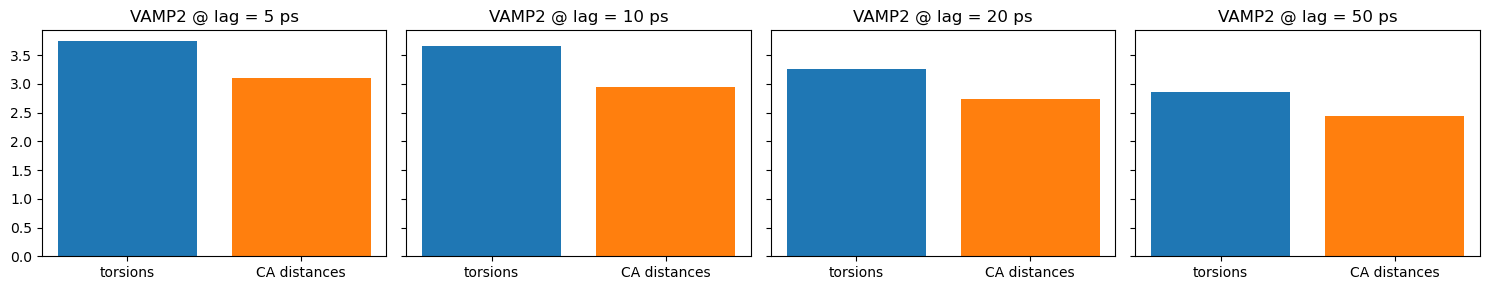

In [51]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
plot_for_lag_2(axes[0], 5)
plot_for_lag_2(axes[1], 10)
plot_for_lag_2(axes[2], 20)
plot_for_lag_2(axes[3], 50)

In [53]:
data_concatenated = data_torsions + [data_torsions_test] # concatenate two lists
type(data_concatenated)

list

/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 6/6 [00:00<00:00, 13.69it/s]                       


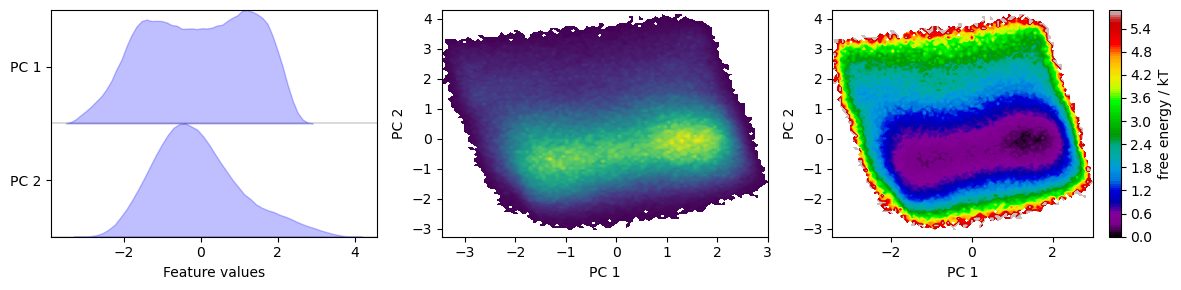

In [54]:
pca = pyemma.coordinates.pca(data_concatenated, dim=2)
pca_concatenated = np.concatenate(pca.get_output())

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
pyemma.plots.plot_feature_histograms(
    pca_concatenated,
    ['PC {}'.format(i + 1) for i in range(pca.dimension())],
    ax=axes[0])
pyemma.plots.plot_density(*pca_concatenated[:, :2].T, ax=axes[1], cbar=False)
pyemma.plots.plot_free_energy(*pca_concatenated[:, :2].T, ax=axes[2], legacy=False)
for ax in axes.flat[1:]:
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
fig.tight_layout()

/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 6/6 [00:01<00:00,  4.84it/s]                        
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 6/6 [00:01<00:00,  5.23it/s]                        
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/amangini/miniconda3/

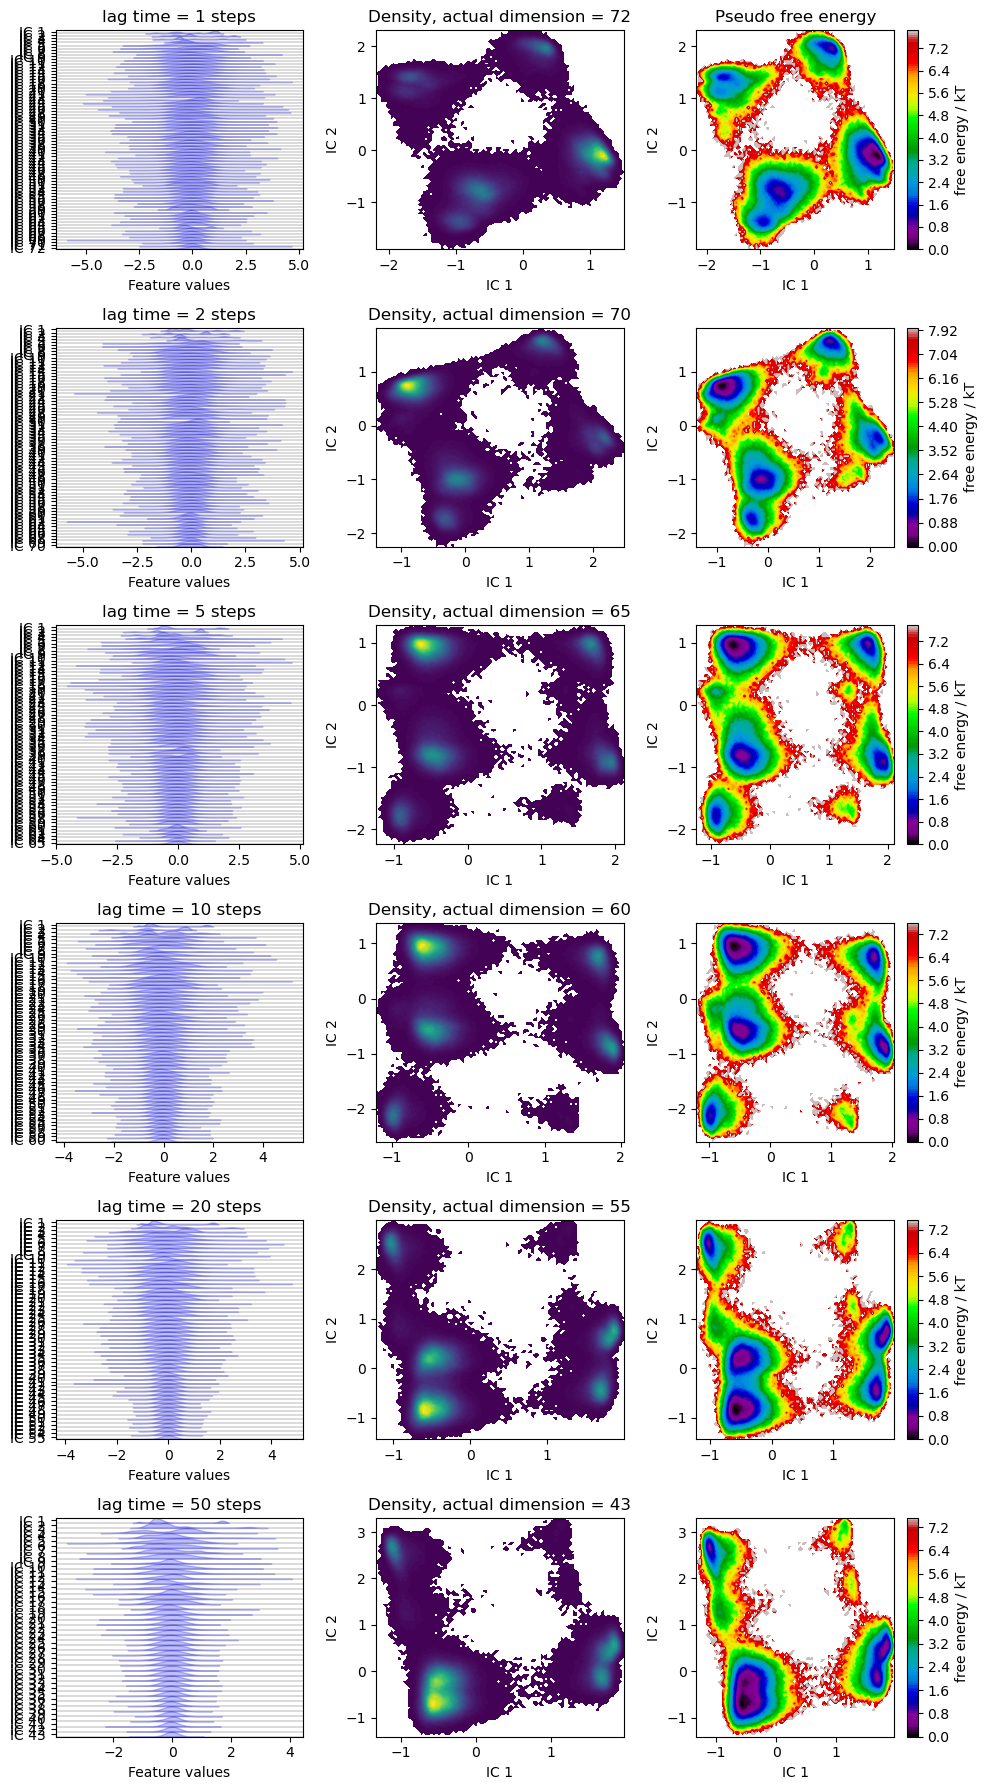

In [63]:
lags = [1, 2, 5, 10, 20, 50]

fig, axes = plt.subplots(6, 3, figsize=(10, 18))
for i, lag in enumerate(lags):
    tica = pyemma.coordinates.tica(data_concatenated, lag=lag)
    tica_concatenated = np.concatenate(tica.get_output())
    pyemma.plots.plot_feature_histograms(
        tica_concatenated,
        ['IC {}'.format(i + 1) for i in range(tica.dimension())],
        ax=axes[i, 0],ignore_dim_warning=True)
    axes[i, 0].set_title('lag time = {} steps'.format(lag))
    axes[i, 1].set_title(
        'Density, actual dimension = {}'.format(tica.dimension()))
    pyemma.plots.plot_density(
        *tica_concatenated[:, :2].T, ax=axes[i, 1], cbar=False)
    pyemma.plots.plot_free_energy(
        *tica_concatenated[:, :2].T, ax=axes[i, 2], legacy=False)
for ax in axes[:, 1:].flat:
    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC 2')
axes[0, 2].set_title('Pseudo free energy')
fig.tight_layout()

/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 6/6 [00:00<00:00, 68.92it/s]               
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
kmeans iterations: 100%|██████████| 50/50 [00:11<00:00,  7.20it/s]/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Cons

24-01-25 13:43:10 pyemma.coordinates.clustering.kmeans.KmeansClustering[255] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


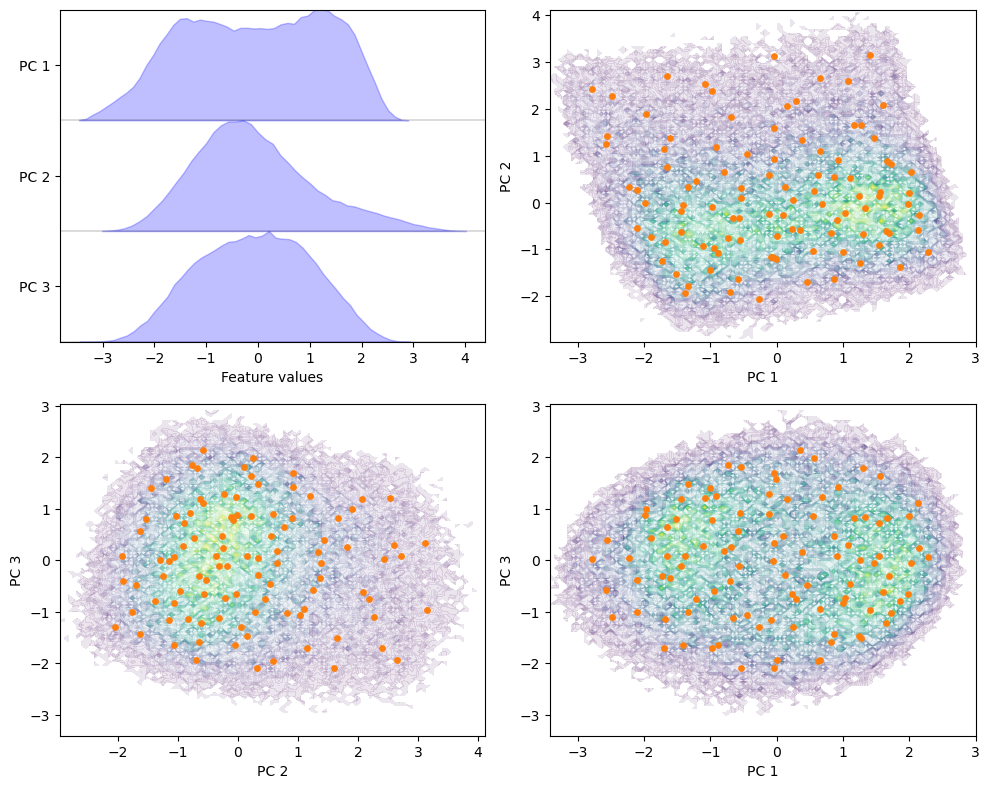

In [64]:
pca = pyemma.coordinates.pca(data_concatenated, dim=3)
pca_concatenated = np.concatenate(pca.get_output(stride=5))

cluster = pyemma.coordinates.cluster_kmeans(pca, k=100, max_iter=50, stride=5)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
pyemma.plots.plot_feature_histograms(
    pca_concatenated, ['PC {}'.format(i + 1) for i in range(pca.dimension())], ax=axes[0, 0])
for ax, (i, j) in zip(axes.flat[1:], [[0, 1], [1, 2], [0, 2]]):
    pyemma.plots.plot_density(*pca_concatenated[:, [i, j]].T, ax=ax, cbar=False, alpha=0.1)
    ax.scatter(*cluster.clustercenters[:, [i, j]].T, s=15, c='C1')
    ax.set_xlabel('PC {}'.format(i + 1))
    ax.set_ylabel('PC {}'.format(j + 1))
fig.tight_layout()

/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 6/6 [00:00<00:00, 48.98it/s]                        
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
kmeans iterations: 100%|██████████| 50/50 [00:10<00:00,  7.43it/s]/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 50 iter

24-01-25 13:43:57 pyemma.coordinates.clustering.kmeans.KmeansClustering[259] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


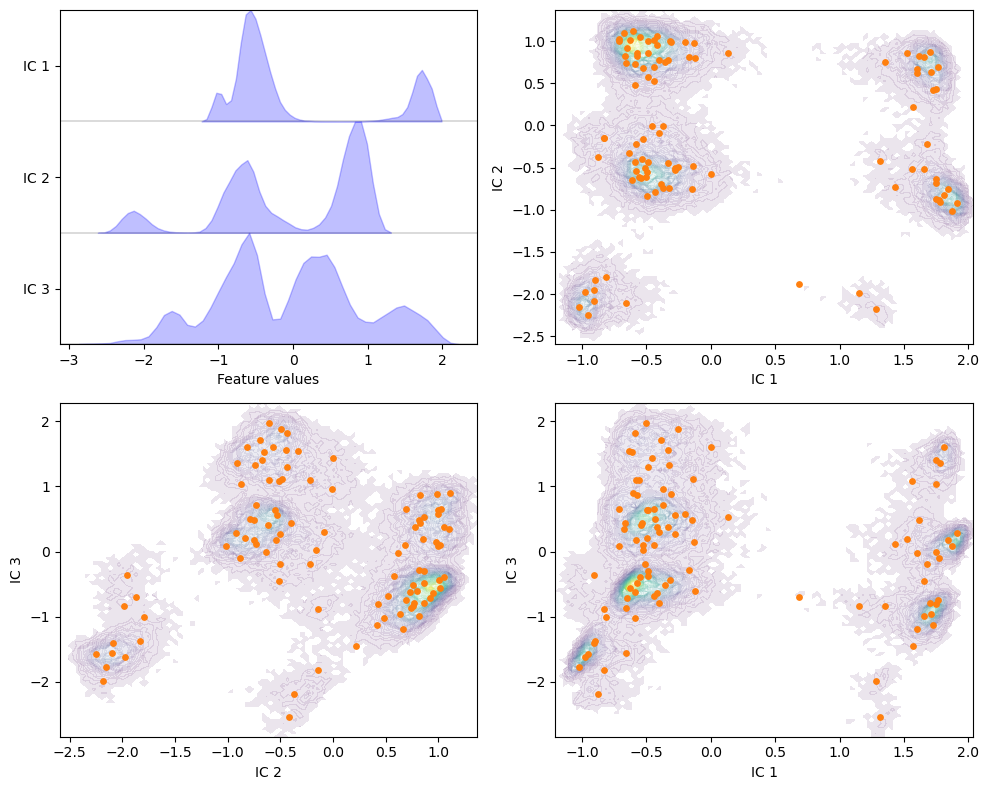

In [65]:
tica = pyemma.coordinates.tica(data_concatenated, dim=3)
tica_concatenated = np.concatenate(tica.get_output(stride=5))

cluster = pyemma.coordinates.cluster_kmeans(tica, k=100, max_iter=50, stride=5)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
pyemma.plots.plot_feature_histograms(
    tica_concatenated, ['IC {}'.format(i + 1) for i in range(tica.dimension())], ax=axes[0, 0])
for ax, (i, j) in zip(axes.flat[1:], [[0, 1], [1, 2], [0, 2]]):
    pyemma.plots.plot_density(
        *tica_concatenated[:, [i, j]].T, ax=ax, cbar=False, alpha=0.1)
    ax.scatter(*cluster.clustercenters[:, [i, j]].T, s=15, c='C1')
    ax.set_xlabel('IC {}'.format(i + 1))
    ax.set_ylabel('IC {}'.format(j + 1))
fig.tight_layout()

/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 6/6 [00:00<00:00, 42.58it/s]                        
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
kmeans iterations: 100%|██████████| 50/50 [00:10<00:00,  7.39it/s]/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 50 iter

24-01-25 13:44:50 pyemma.coordinates.clustering.kmeans.KmeansClustering[263] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


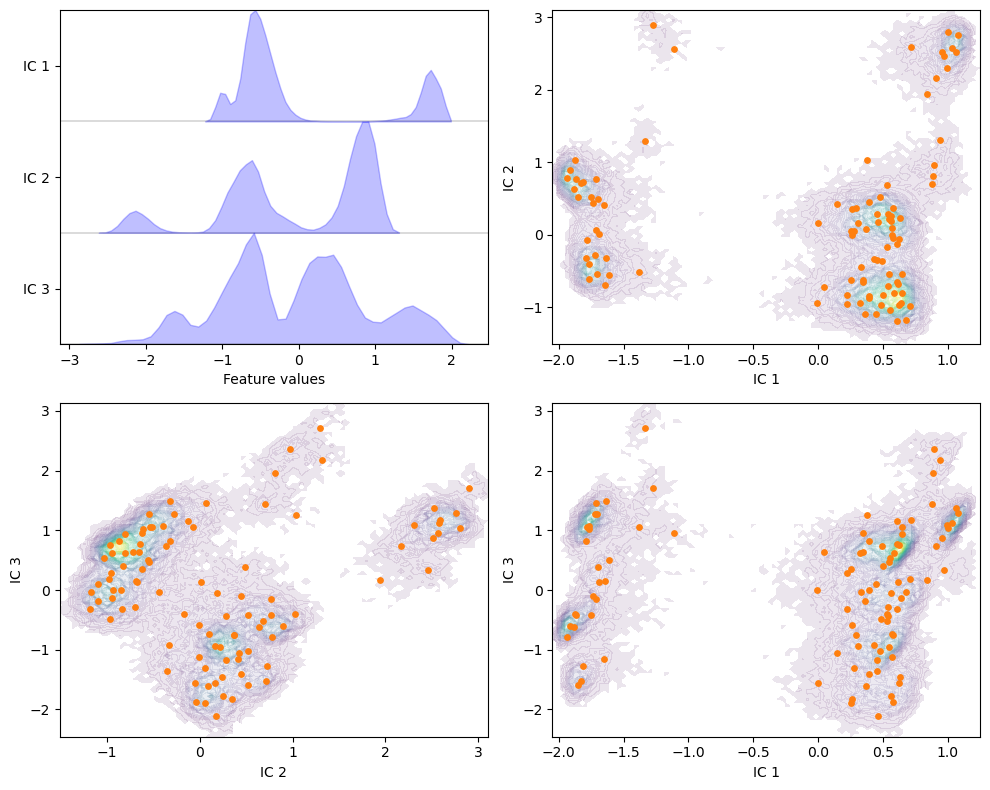

In [66]:
vamp = pyemma.coordinates.vamp(data_concatenated, lag=20, dim=3)
vamp_concatenated = np.concatenate(vamp.get_output(stride=5))

cluster = pyemma.coordinates.cluster_kmeans(vamp, k=100, max_iter=50, stride=5)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
pyemma.plots.plot_feature_histograms(
    tica_concatenated, ['IC {}'.format(i + 1) for i in range(tica.dimension())], ax=axes[0, 0])
for ax, (i, j) in zip(axes.flat[1:], [[0, 1], [1, 2], [0, 2]]):
    pyemma.plots.plot_density(*vamp_concatenated[:, [i, j]].T, ax=ax, cbar=False, alpha=0.1)
    ax.scatter(*cluster.clustercenters[:, [i, j]].T, s=15, c='C1')
    ax.set_xlabel('IC {}'.format(i + 1))
    ax.set_ylabel('IC {}'.format(j + 1))
fig.tight_layout()

In [70]:
torsions_feat = pyemma.coordinates.featurizer(pdb)
torsions_feat.add_backbone_torsions(cossin=True, periodic=False)
torsions_data = pyemma.coordinates.load(files, features=torsions_feat)

100%|██████████| 9/9 [00:16<00:00,  1.85s/it]                                 


In [71]:
tica = pyemma.coordinates.tica(torsions_data, lag=5)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 9/9 [00:00<00:00, 14.60it/s]                        


In [72]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=75, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
kmeans iterations: 100%|██████████| 50/50 [00:08<00:00,  9.33it/s]/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
  warnings.warn(f"Algorithm did not reach convergence criterion"
100%|██████████| 75/75 [00:08<00:00,  8.95it/s]                             

100%|██████████| 50/50 [00:08<00:00,  5.97it/s]                   

24-01-25 14:03:01 pyemma.coordinates.clustering.kmeans.KmeansClustering[268] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
100%|██████████| 9/9 [00:00<00:00, 52.80it/s]                                    


estimating BayesianHMSM:   0%|          | 0/8 [00:00<?, ?it/s]/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/deeptime/markov/tools/analysis/_decomposition.py:496: ImaginaryEigenValueWarning: Using eigenvalues with non-zero imaginary part
  warnings.warn('Using eigenvalues with non-zero imaginary part', ImaginaryEigenValueWarning)
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/deeptime/markov/tools/analysis/_decomposition.py:496: ImaginaryEigenValueWarning: Using eigenvalues with non-zero imaginary part
  warnings.warn('Using eigenvalues with non-zero imaginary part', ImaginaryEigenValueWarning)
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/deeptime/markov/tools/analysis/_decomposition.py:496: ImaginaryEigenValueWarning: Using eigenvalues with non-zero imaginary part
  warnings.warn('Using eigenvalues with non-zero imaginary part', ImaginaryEigenValueWarning)
/home/amangini/miniconda3/envs/pyemma/lib/python3.11/site-packages/d

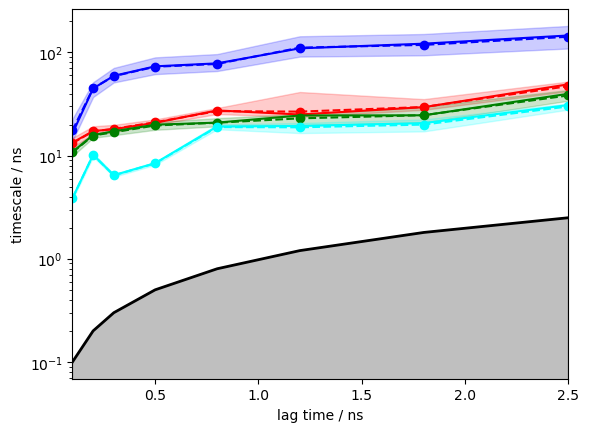

In [73]:
nstates = 5
its_hmm = pyemma.msm.timescales_hmsm(cluster.dtrajs, nstates, lags=25, errors='bayes')
pyemma.plots.plot_implied_timescales(its_hmm, units='ns', dt=0.1);





estimating MaximumLikelihoodHMSM:   0%|          | 0/5 [00:00<?, ?it/s]



estimating MaximumLikelihoodHMSM:  20%|██        | 1/5 [00:07<00:30,  7.57s/it]



estimating MaximumLikelihoodHMSM:  40%|████      | 2/5 [00:07<00:09,  3.22s/it]



estimating MaximumLikelihoodHMSM:  60%|██████    | 3/5 [00:08<00:03,  1.92s/it]



estimating MaximumLikelihoodHMSM:  80%|████████  | 4/5 [00:08<00:01,  1.32s/it]



estimating MaximumLikelihoodHMSM: 100%|██████████| 5/5 [00:18<00:00,  4.30s/it]



Sampling HMSMs:   0%|          | 0/100 [01:01<?, ?it/s]


TypeError: legend() takes 0-2 positional arguments but 3 were given

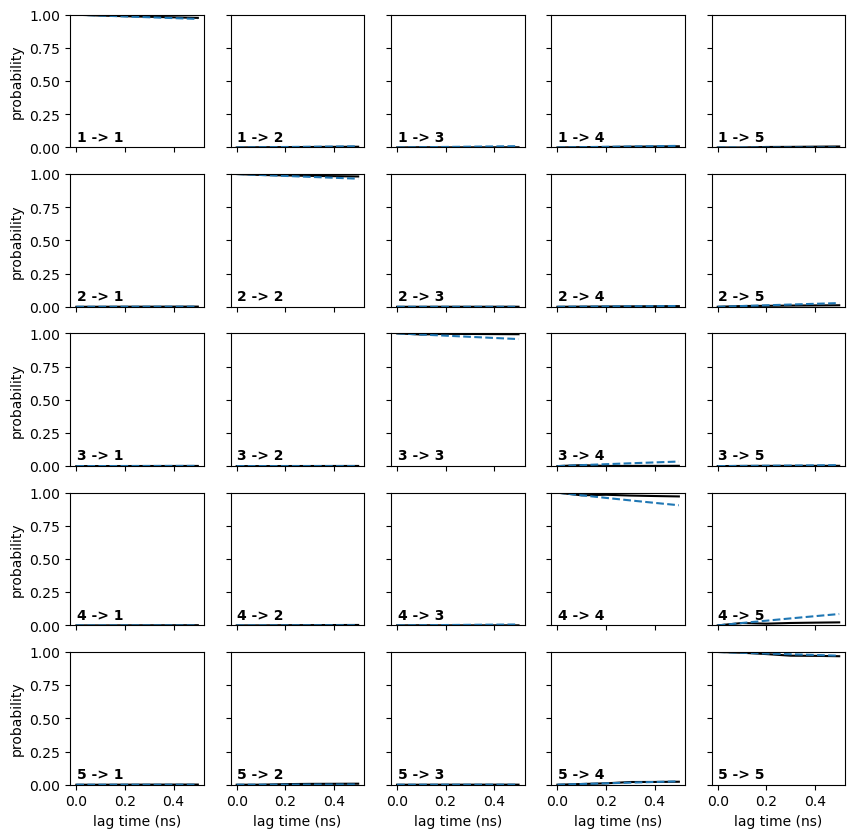

In [87]:
#hmm = pyemma.msm.bayesian_hidden_markov_model(cluster.dtrajs, nstates, lag=1, dt_traj='0.1 ns')
hmm = pyemma.msm.estimate_hidden_markov_model(cluster.dtrajs, nstates, lag=1) #essa função foi encontrada no common problems, verificar como arrumar a função original

cktest = hmm.cktest(mlags=6)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');

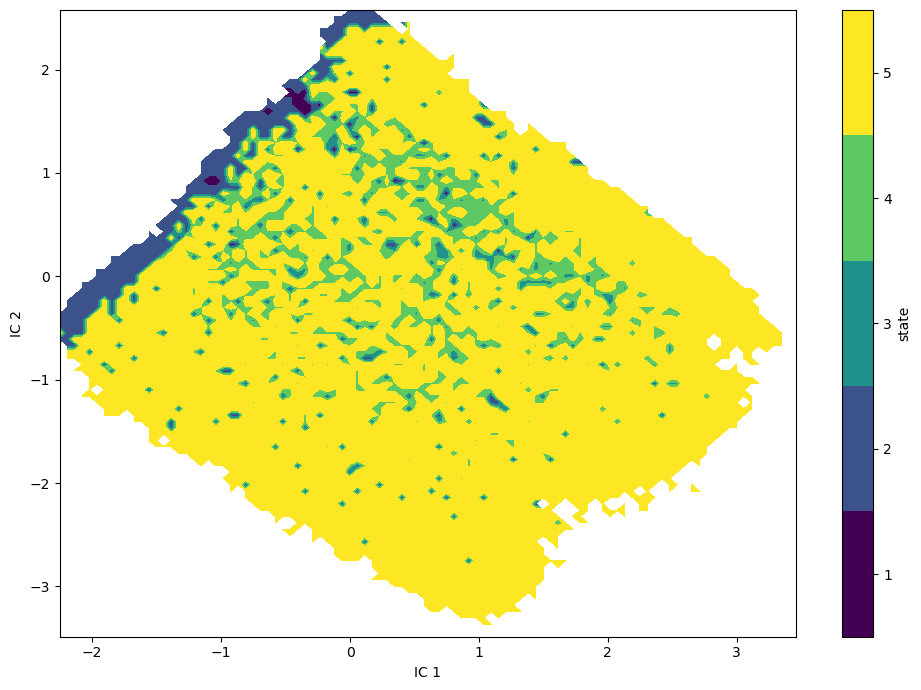

In [88]:
metastable_traj = hmm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(10, 7))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, [0, 1]].T, metastable_traj, ax=ax)

misc['cbar'].set_ticklabels(range(1, hmm.nstates + 1))
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')

fig.tight_layout()

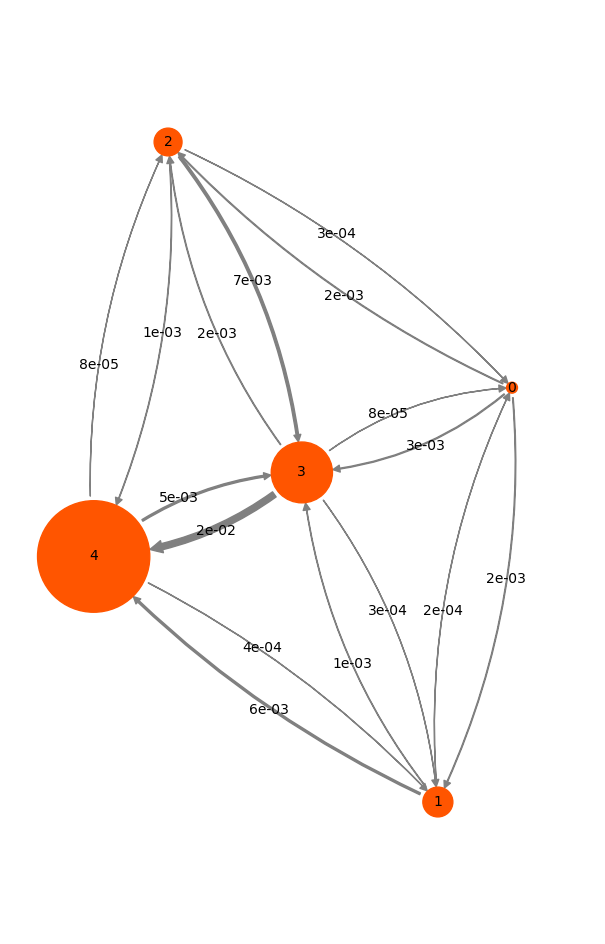

In [89]:
pyemma.plots.plot_markov_model(hmm);

In [91]:
hmm_samples = hmm.sample_by_observation_probabilities(50)

data_source = pyemma.coordinates.source(files, features=torsions_feat)

pyemma.coordinates.save_trajs(
    data_source,
    hmm_samples,
    outfiles=['./data/hmm_{}.pdb'.format(n + 1)
              for n in range(hmm.nstates)])

100%|██████████| 9/9 [00:00<00:00, 212.89it/s]            


['./data/hmm_1.pdb',
 './data/hmm_2.pdb',
 './data/hmm_3.pdb',
 './data/hmm_4.pdb',
 './data/hmm_5.pdb']